In [1]:
import pandas as pd
import numpy as np
#csv so I can read in my 2 csv file
import csv
#matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline
#cv so models can be tested for overfitting
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.cross_validation import cross_val_score

#knn
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

#create a dt model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
#for bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import RFE
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression

import seaborn as sns

In [2]:
movieData=pd.read_csv('movieData.csv')

In [3]:
movieDataLow=pd.read_csv('movieDataLow.csv')

In [4]:
movieDataLow.tail(1)


,Unnamed: 0,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Ranking,...,Released,Response,Runtime,Title,Type,Writer,Year,imdbID,imdbRating,imdbVotes
84,84,"Bo Derek, Anthony Quinn, Don Murray, Julie Newmar",4 wins & 6 nominations.,USA,John Derek,"Comedy, Crime, Fantasy",English,NaN,Elderly Scott kills himself after a heart atta...,99,...,01 Jun 1990,True,90 min,Ghosts Can't Do It,movie,John Derek (by),1989,tt0099656,2.3,"1,964"


In [5]:
#merging the data from the top movies and the data from the lowest of low movies
movieDataAll= pd.concat([movieData, movieDataLow], ignore_index=True)

In [6]:
movieDataAll.tail(1)

,Unnamed: 0,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Ranking,...,Released,Response,Runtime,Title,Type,Writer,Year,imdbID,imdbRating,imdbVotes
327,84,"Bo Derek, Anthony Quinn, Don Murray, Julie Newmar",4 wins & 6 nominations.,USA,John Derek,"Comedy, Crime, Fantasy",English,NaN,Elderly Scott kills himself after a heart atta...,99,...,01 Jun 1990,True,90 min,Ghosts Can't Do It,movie,John Derek (by),1989,tt0099656,2.3,"1,964"


In [8]:
movieDataAll.columns

Index([u'Unnamed: 0', u'Actors', u'Awards', u'Country', u'Director', u'Genre',
       u'Language', u'Metascore', u'Plot', u'Ranking', u'Rated', u'Released',
       u'Response', u'Runtime', u'Title', u'Type', u'Writer', u'Year',
       u'imdbID', u'imdbRating', u'imdbVotes'],
      dtype='object')

In [9]:
movieDataEdited=movieDataAll.copy()

In [10]:
movieDataEdited.head(1)

,Unnamed: 0,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Ranking,...,Released,Response,Runtime,Title,Type,Writer,Year,imdbID,imdbRating,imdbVotes
0,0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Nominated for 7 Oscars. Another 18 wins & 30 n...,USA,Frank Darabont,"Crime, Drama",English,80.0,Two imprisoned men bond over a number of years...,0,...,14 Oct 1994,True,142 min,The Shawshank Redemption,movie,"Stephen King (short story ""Rita Hayworth and S...",1994,tt0111161,9.3,"1,711,064"


imdbRating = float
imdbVotes = object - need to convert to integer

1 missing
Language
imdbRating
imdbVotes

2 missing from rating, runtime 
metascore missing 80
plot missing 3
rating 4

In [11]:
#printing each column to check for missing data and if data is an object when
#it needs to be converted to a number
tColumms = []
i=0
for labels in movieDataEdited.columns:  
    if i >=0:
        tColumms.append(labels)
        i = i+1
    else:
        i=i+1

for item in tColumms:
    print 'For %s' %item
    print movieDataEdited[item].isnull().sum()
    print movieDataEdited[item].describe()
    print ' '

For Unnamed: 0
0
count    328.000000
mean     100.527439
std       70.816638
min        0.000000
25%       40.750000
50%       81.500000
75%      160.250000
max      242.000000
Name: Unnamed: 0, dtype: float64
 
For Actors
0
count                                                   328
unique                                                  327
top       Mark Hamill, Harrison Ford, Carrie Fisher, Bil...
freq                                                      2
Name: Actors, dtype: object
 
For Awards
54
count        274
unique       244
top       1 win.
freq           8
Name: Awards, dtype: object
 
For Country
0
count     328
unique     67
top       USA
freq      176
Name: Country, dtype: object
 
For Director
0
count                   328
unique                  232
top       Christopher Nolan
freq                      7
Name: Director, dtype: object
 
For Genre
0
count       328
unique      143
top       Drama
freq         22
Name: Genre, dtype: object
 
For Language
1
count        

//anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


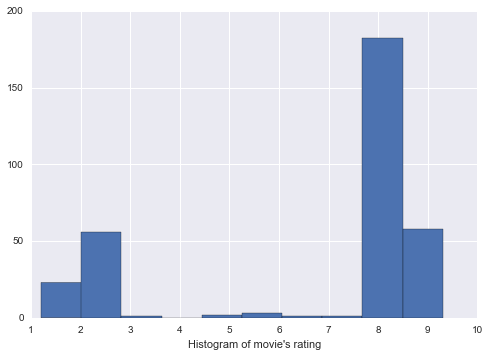

In [104]:
#imdbRating is the target variable
# the histogram show that two very different list were imported

plt.hist(movieDataEdited['imdbRating'])
plt.xlabel('Histogram of movie\'s rating');


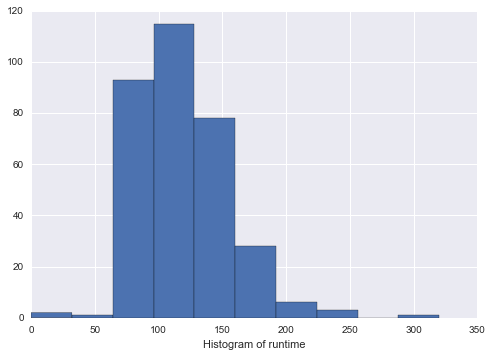

In [102]:
plt.hist(movieDataEdited['Runtime'])
plt.xlabel('Histogram of runtime');

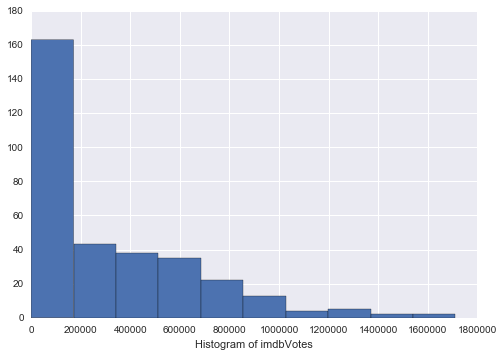

In [103]:

plt.hist(movieDataEdited['imdbVotes'])
plt.xlabel('Histogram of imdbVotes');

In [13]:
#one imdbVotes missing
#strip the comma out of the number
#movieDataEdited['imdbVotes'] = movieDataEdited['imdbVotes'].str.strip(',)
movieDataEdited['imdbVotes']=movieDataEdited['imdbVotes'].str.replace(',','')
movieDataEdited['imdbVotes'].fillna(0, inplace=True)
movieDataEdited['imdbVotes']=movieDataEdited['imdbVotes'].astype(int)
#movieDataEdited['imdbVotes']

In [14]:
#two run times missing

movieDataEdited['Runtime']=movieDataEdited['Runtime'].str.replace(' min','')
movieDataEdited['Runtime'].fillna(0, inplace=True)
movieDataEdited['Runtime']=movieDataEdited['Runtime'].astype(int)

In [15]:
#drop the one record with imdbRating missing
#since this was the target I did not feel comfortable filling in with an average
print movieDataEdited.shape
movieDataEdited = movieDataEdited.dropna(subset=['imdbRating'])
print movieDataEdited.shape

(328, 21)
(327, 21)


In [16]:
movieDataEdited['Runtime'].head()

0    142
1    175
2    202
3    152
4     96
Name: Runtime, dtype: int64

In [17]:
#splittig apart Genre so dummies can be created
tempDF=movieDataEdited['Genre'].str[0:].str.split(',', expand=True )
tempDF.columns

RangeIndex(start=0, stop=3, step=1)

In [18]:
#pd.melt?

In [20]:
#creating the dummies
tempGenre=pd.get_dummies(tempDF)


In [21]:
tempGenre.columns

Index([u'0_Action', u'0_Adventure', u'0_Animation', u'0_Biography',
       u'0_Comedy', u'0_Crime', u'0_Drama', u'0_Fantasy', u'0_Film-Noir',
       u'0_Horror', u'0_Mystery', u'0_Sci-Fi', u'0_Western', u'1_ Action',
       u'1_ Adventure', u'1_ Biography', u'1_ Comedy', u'1_ Crime',
       u'1_ Drama', u'1_ Family', u'1_ Fantasy', u'1_ Film-Noir',
       u'1_ History', u'1_ Horror', u'1_ Music', u'1_ Musical', u'1_ Mystery',
       u'1_ Romance', u'1_ Sci-Fi', u'1_ Sport', u'1_ Thriller', u'1_ War',
       u'1_ Western', u'2_ Adventure', u'2_ Comedy', u'2_ Crime', u'2_ Drama',
       u'2_ Family', u'2_ Fantasy', u'2_ Film-Noir', u'2_ History',
       u'2_ Horror', u'2_ Music', u'2_ Musical', u'2_ Mystery', u'2_ Romance',
       u'2_ Sci-Fi', u'2_ Sport', u'2_ Thriller', u'2_ War', u'2_ Western'],
      dtype='object')

In [22]:
tempGenre.shape

(327, 51)

In [23]:
#adding the genre columns together by genre
tempGenre['gAction']=tempGenre['0_Action'] + tempGenre['1_ Action'] 

tempGenre['gAdventure']=tempGenre['0_Adventure'] + tempGenre['1_ Adventure']+tempGenre['2_ Adventure']

tempGenre['gAnimation']=tempGenre['0_Animation'] 

tempGenre['gBiography']=tempGenre['0_Biography'] + tempGenre['1_ Biography']

tempGenre['gComedy']=tempGenre['0_Comedy']+tempGenre['1_ Comedy'] + tempGenre['2_ Comedy']



tempGenre['gCrime']=tempGenre['0_Crime']+tempGenre['1_ Crime'] + tempGenre['2_ Crime']

tempGenre['gDrama']=tempGenre['0_Drama']+tempGenre['1_ Drama'] + tempGenre['2_ Drama']

tempGenre['gFamily']=tempGenre['1_ Family'] + tempGenre['2_ Family']

tempGenre['gFantasy']=tempGenre['0_Fantasy']+tempGenre['1_ Fantasy'] + tempGenre['2_ Fantasy']

tempGenre['gFilmNoir']=tempGenre['0_Film-Noir']+tempGenre['1_ Film-Noir'] + tempGenre['2_ Film-Noir']
tempGenre['gHistory']=tempGenre['1_ History'] + tempGenre['2_ History']

tempGenre['gHorror']=tempGenre['0_Horror']+tempGenre['1_ Horror'] + tempGenre['2_ Horror']
tempGenre['gMusic']=tempGenre['1_ Music'] + tempGenre['2_ Music']

tempGenre['gMusical']=tempGenre['1_ Musical'] + tempGenre['2_ Musical']

tempGenre['Mystery']=tempGenre['0_Mystery'] + tempGenre['1_ Mystery']+ tempGenre['2_ Mystery']

tempGenre['gRomance']=tempGenre['1_ Romance'] + tempGenre['2_ Romance']

tempGenre['gSciFi']=tempGenre['0_Sci-Fi']+tempGenre['1_ Sci-Fi'] + tempGenre['2_ Sci-Fi']

tempGenre['gSport']=tempGenre['1_ Sport'] + tempGenre['2_ Sport']
tempGenre['gThiller']=tempGenre['1_ Thriller'] + tempGenre['2_ Thriller']

tempGenre['gWar']=tempGenre['1_ War'] + tempGenre['2_ War']
tempGenre['gWestern']=tempGenre['0_Western'] + tempGenre['1_ Western'] + tempGenre['2_ Western']






In [24]:
tempGenre=tempGenre[['gAction','gAdventure','gAnimation','gComedy','gBiography',
                     'gCrime','gDrama','gFamily','gFantasy','gFilmNoir','gHistory',
                     'gHorror','gMusic','gMusical','Mystery',
                     'gRomance','gSciFi','gSport','gThiller','gWar','gWestern']]


In [25]:
#did the code below to for checking it did add correctly
# tColumms = []
# i=0
# for labels in X.columns:  
#     if i >=0:
#         tColumms.append(labels)
#         i = i+1
#     else:
#         i=i+1

# for item in tColumms:
#     print 'For %s' %item
#     print X[item].isnull().sum()
#     print X[item].describe()
#     print ' '

In [26]:
tempGenre.head(1)

,gAction,gAdventure,gAnimation,gComedy,gBiography,gCrime,gDrama,gFamily,gFantasy,gFilmNoir,...,gHorror,gMusic,gMusical,Mystery,gRomance,gSciFi,gSport,gThiller,gWar,gWestern
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
movieDataEdited.columns

Index([u'Unnamed: 0', u'Actors', u'Awards', u'Country', u'Director', u'Genre',
       u'Language', u'Metascore', u'Plot', u'Ranking', u'Rated', u'Released',
       u'Response', u'Runtime', u'Title', u'Type', u'Writer', u'Year',
       u'imdbID', u'imdbRating', u'imdbVotes'],
      dtype='object')

In [28]:
#joing the main db with the genre dummies
movieDataEdited=pd.DataFrame(movieDataEdited).join(pd.DataFrame(tempGenre))

In [29]:
movieDataEdited.shape


(327, 42)

In [30]:
movieDataEdited.columns

Index([u'Unnamed: 0', u'Actors', u'Awards', u'Country', u'Director', u'Genre',
       u'Language', u'Metascore', u'Plot', u'Ranking', u'Rated', u'Released',
       u'Response', u'Runtime', u'Title', u'Type', u'Writer', u'Year',
       u'imdbID', u'imdbRating', u'imdbVotes', u'gAction', u'gAdventure',
       u'gAnimation', u'gComedy', u'gBiography', u'gCrime', u'gDrama',
       u'gFamily', u'gFantasy', u'gFilmNoir', u'gHistory', u'gHorror',
       u'gMusic', u'gMusical', u'Mystery', u'gRomance', u'gSciFi', u'gSport',
       u'gThiller', u'gWar', u'gWestern'],
      dtype='object')

In [31]:
#cleaning up the rated feature
#movieDataEdited['Rated']=movieDataEdited['Rated']
movieDataEdited['Rated'].fillna('Unknown', inplace=True)


In [32]:
movieDataEdited['Rated'].describe()

count     327
unique     12
top         R
freq      120
Name: Rated, dtype: object

In [33]:
#now to add dummies for 'Rated'. I first need to fillin withe word unknown for unknows
#new dataframe to hold dummies 

In [34]:

dummiedRated=pd.get_dummies(movieDataEdited['Rated'],prefix='Rated_')
dummiedRated.shape

(327, 12)

In [35]:
#joining the maid db with the rated dummies
movieDataEdited=pd.DataFrame(movieDataEdited).join(pd.DataFrame(dummiedRated))

In [36]:
#see if the word in the awards matter - I am only going to pick up the top words
movieDataEdited['Awards'].fillna('Unknown', inplace=True)


In [37]:
v = CountVectorizer(
    binary=True,  # Create binary features
    stop_words='english', # Ignore common words such as 'the', 'and'
    max_features=10, # Only use the top 50 most common words
)

In [38]:
#top words in the awards column
wordsAward = v.fit_transform(movieDataEdited['Awards']).todense()  
wordsAward = pd.DataFrame(wordsAward, columns=v.get_feature_names())
wordsAward.sum().sort_values(ascending=False).head()

wins           244
nominations    232
oscars         122
won            110
nominated       86
dtype: int64

In [39]:
wordsAward['wins'].fillna(0, inplace=True)
wordsAward['nominations'].fillna(0, inplace=True)
wordsAward['oscars'].fillna(0, inplace=True)
wordsAward['won'].fillna(0, inplace=True)



In [40]:
wordsAward['wins'].describe()

count    327.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: wins, dtype: float64

In [41]:
wordsAward=wordsAward[['wins','nominations', 'oscars', 'won']]
wordsAward.head(2)

,wins,nominations,oscars,won
0,0,1,1,0
1,0,1,1,1


In [42]:
#joining the main database with the award words 
print movieDataEdited.shape
movieDataEdited=pd.DataFrame(movieDataEdited).join(pd.DataFrame(wordsAward))
print movieDataEdited.shape

(327, 54)
(327, 58)


In [43]:
movieDataEdited.columns

Index([      u'Unnamed: 0',           u'Actors',           u'Awards',
                u'Country',         u'Director',            u'Genre',
               u'Language',        u'Metascore',             u'Plot',
                u'Ranking',            u'Rated',         u'Released',
               u'Response',          u'Runtime',            u'Title',
                   u'Type',           u'Writer',             u'Year',
                 u'imdbID',       u'imdbRating',        u'imdbVotes',
                u'gAction',       u'gAdventure',       u'gAnimation',
                u'gComedy',       u'gBiography',           u'gCrime',
                 u'gDrama',          u'gFamily',         u'gFantasy',
              u'gFilmNoir',         u'gHistory',          u'gHorror',
                 u'gMusic',         u'gMusical',          u'Mystery',
               u'gRomance',           u'gSciFi',           u'gSport',
               u'gThiller',             u'gWar',         u'gWestern',
        u'Rated__APP

In [44]:
#Creating the independent factures
X=movieDataEdited[['Ranking','Runtime','Year',
                  'imdbVotes', 'gAction', 'gAdventure',
       'gAnimation', 'gComedy', 'gBiography', 'gCrime', 'gDrama',
       'gFamily', u'gFantasy', 'gFilmNoir', 'gHistory', 'gHorror',
       'gMusic', 'gMusical', 'Mystery', 'gRomance', 'gSciFi', 'gSport',
       'gThiller', 'gWar', 'gWestern','Rated__APPROVED', 'Rated__G',
       'Rated__M', 'Rated__NOT RATED', 'Rated__PASSED', 'Rated__PG',
       'Rated__PG-13', 'Rated__R', 'Rated__TV-MA', 'Rated__TV-PG',
       'Rated__UNRATED', 'Rated__Unknown', 'wins','nominations','oscars','won']]

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
#creating the target feature 
#Selected a rating or 8 or above to be indication of good or bad
le = LabelEncoder()
y = le.fit_transform(movieDataEdited['imdbRating'].apply(lambda x: 1 if x > 8.0 else 0))
#y=movieDataEdited['imdbRating'].apply(lambda x: 1 if x > 8.0 else 0)



# separating the file into train test
Test dataset will prove that the model can be used for data other than what it was fitted for

In [47]:
# now we have our X and y - lets create the TTS
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size =.4)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((196, 41), (131, 41), (196,), (131,))

In [89]:
tColumms = []
i=0
for labels in x_test.columns:  
    if i >=0:
        tColumms.append(labels)
        i = i+1
    else:
        i=i+1

for item in tColumms:
    print 'For %s' %item
    print x_test[item].isnull().sum()
    print x_test[item].describe()
    print ' '

For Ranking
0
count    131.000000
mean     111.725191
std       71.237636
min        0.000000
25%       48.000000
50%       95.000000
75%      171.500000
max      246.000000
Name: Ranking, dtype: float64
 
For Runtime
0
count    131.000000
mean     121.679389
std       36.317884
min       68.000000
25%       94.000000
50%      117.000000
75%      138.000000
max      320.000000
Name: Runtime, dtype: float64
 
For Year
0
count     131.000000
mean     1986.572519
std        22.522136
min      1921.000000
25%      1970.500000
50%      1993.000000
75%      2004.000000
max      2015.000000
Name: Year, dtype: float64
 
For imdbVotes
0
count    1.310000e+02
mean     2.951754e+05
std      3.221855e+05
min      1.529000e+03
25%      3.380900e+04
50%      1.745660e+05
75%      4.901360e+05
max      1.711064e+06
Name: imdbVotes, dtype: float64
 
For gAction
0
count    131.000000
mean       0.137405
std        0.345596
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000


In [88]:
#some garbage came in so I filled in with 0
x_test['wins'].fillna(0, inplace=True)
x_test['nominations'].fillna(0, inplace=True)
x_test['oscars'].fillna(0, inplace=True)
x_test['won'].fillna(0, inplace=True)


//anaconda/lib/python2.7/site-packages/pandas/core/generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [87]:
x_test.tail(25)

,Ranking,Runtime,Year,imdbVotes,gAction,gAdventure,gAnimation,gComedy,gBiography,gCrime,...,Rated__PG-13,Rated__R,Rated__TV-MA,Rated__TV-PG,Rated__UNRATED,Rated__Unknown,wins,nominations,oscars,won
191,196,127,1993,621209,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
186,191,212,1959,164623,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
98,101,170,1983,544522,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
315,87,85,2009,57275,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25,25,116,1997,424251,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
97,100,125,1960,111667,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28,28,169,1998,897416,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
197,202,132,2003,69027,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
150,154,94,1996,476740,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
153,157,130,1940,88307,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


# Model 1 knn  use to see if prediction can be made given
# the closest neighbors
after knn is done then will test it using CV

In [48]:
#before we begin looking at the correlation matrix for guidance
corr=X.corr()
corr


,Ranking,Runtime,Year,imdbVotes,gAction,gAdventure,gAnimation,gComedy,gBiography,gCrime,...,Rated__PG-13,Rated__R,Rated__TV-MA,Rated__TV-PG,Rated__UNRATED,Rated__Unknown,wins,nominations,oscars,won
Ranking,1.000000,0.166923,-0.031162,-0.122448,-0.092516,0.081351,0.072647,-0.143387,0.130037,0.007606,...,-0.012198,-0.010652,-0.011385,-0.064433,0.011342,-0.154434,NaN,0.195128,0.082923,0.077146
Runtime,0.166923,1.000000,0.038618,0.374772,0.048979,0.069203,-0.129315,-0.330055,0.233858,0.137829,...,0.065452,0.190544,-0.038455,-0.078128,-0.084346,-0.184482,NaN,0.335349,0.310923,0.354610
Year,-0.031162,0.038618,1.000000,0.310388,0.145285,0.084991,0.178643,0.080669,0.088988,0.003600,...,0.298420,0.297005,0.045555,-0.051459,-0.213459,0.072864,NaN,0.013523,0.002370,0.016468
imdbVotes,-0.122448,0.374772,0.310388,1.000000,0.176595,0.144707,0.033693,-0.190820,0.063800,0.161964,...,0.199719,0.312626,-0.049062,-0.049256,-0.131875,-0.214815,NaN,0.419358,0.363238,0.365342
gAction,-0.092516,0.048979,0.145285,0.176595,1.000000,0.270625,-0.051698,-0.056339,-0.103470,-0.081633,...,0.141510,-0.021335,-0.025718,-0.025718,0.046576,0.168751,NaN,-0.072336,0.021455,-0.026642
gAdventure,0.081351,0.069203,0.084991,0.144707,0.270625,1.000000,0.339596,-0.026982,-0.078304,-0.231666,...,0.090099,-0.258059,0.099797,-0.030737,-0.023594,0.024064,NaN,0.118222,0.122137,0.153020
gAnimation,0.072647,-0.129315,0.178643,0.033693,-0.051698,0.339596,1.000000,0.124272,-0.073437,-0.123458,...,-0.071402,-0.194335,-0.014136,-0.014136,0.023161,-0.061603,NaN,0.079559,0.040027,0.087904
gComedy,-0.143387,-0.330055,0.080669,-0.190820,-0.056339,-0.026982,0.124272,1.000000,-0.108615,-0.072514,...,0.043277,-0.192561,-0.031259,-0.031259,0.013572,0.114380,NaN,-0.194142,-0.136544,-0.187326
gBiography,0.130037,0.233858,0.088988,0.063800,-0.103470,-0.078304,-0.073437,-0.108615,1.000000,0.036992,...,-0.024060,0.162984,-0.015935,-0.015935,-0.053681,-0.069442,NaN,0.083343,0.086810,0.062522
gCrime,0.007606,0.137829,0.003600,0.161964,-0.081633,-0.231666,-0.123458,-0.072514,0.036992,1.000000,...,-0.137498,0.262994,-0.026789,-0.026789,-0.003705,-0.048329,NaN,0.151902,0.116563,0.040208


In [49]:
#knn on training set  starting with 5 of closest neighbors
knn = KNeighborsClassifier(n_neighbors=5)

In [50]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [51]:
print 'The knn score is ' + str(knn.score(x_train, y_train))

The knn score is 0.948979591837


In [52]:
#now runnng the model through CV 5 fold to check for overfitting.
#looks like we do have some overfitting.
scores=cross_val_score(knn, x_train, y_train,  cv=5, scoring ='accuracy')
print scores
print scores.mean()

[ 0.875       0.9         1.          0.97368421  0.89473684]
0.928684210526


In [53]:
#confusion matrix
Y_pred = knn.predict(x_train)
conmat = np.array(confusion_matrix(y_train, Y_pred))

confusion = pd.DataFrame(conmat, index=['High score', 'Low score'],
                         columns=['Predicted High score', 'Low score'])

print(confusion)

            Predicted High score  Low score
High score                    48         10
Low score                      0        138


In [54]:
#Precision is tp/(tp + fp)  is the probabliy that some predicted to be high were not 

#recall = tp/(tp + fn)  that someone who predicted to be high was so

cls_rep = classification_report(y_train, Y_pred)
print(cls_rep)

             precision    recall  f1-score   support

          0       1.00      0.83      0.91        58
          1       0.93      1.00      0.97       138

avg / total       0.95      0.95      0.95       196



# Decision Trees

In [106]:
dt = DecisionTreeClassifier(max_depth = 7, min_samples_split =2)
dt.fit(x_train, y_train)

#note I started with a depth of 3 and only votes and ranking was important. So I 
#increased the depth to 5 and then 7 and 9.  The last change did not add any more variables

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [56]:
print 'Decision tree score is ' + str(dt.score(x_train, y_train))

#pehaps this is a little overfitted

Decision tree score is 1.0


In [57]:
feature_importancesDT = pd.DataFrame(dt.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importancesDT.head()

,importance
imdbVotes,0.825712
Ranking,0.115789
Year,0.021767
Mystery,0.020406
gDrama,0.016325


In [58]:
#lets run model through cv  the result proves the DT was overfitted
scores=cross_val_score(dt, x_train, y_train,  cv=5, scoring ='accuracy')
print scores
print 'The mean for cv with dt is ' + str(scores.mean())


[ 0.9         0.9         0.95        1.          0.94736842]
The mean for cv with dt is 0.939473684211


In [59]:
#setting up the parameters before we start
cv = StratifiedKFold(y, n_folds=3, shuffle=True, random_state=41)
def score(model, name):
    s = cross_val_score(model, x_train, y_train, cv=cv, n_jobs=-1)
    print "{} Score:\t{:0.3} ± {:0.3}".format(name, s.mean().round(3), s.std().round(3))

In [60]:
# #lets run through bagging which is similar to cv
# bdt = BaggingClassifier(DecisionTreeClassifier())
# print score(bdt, "Bagging DT")
#the cv score is different from the bagging score - I wonder which is better
bagging = BaggingClassifier(dt, max_samples=0.5, max_features=0.5)
bagging.fit(x_train, y_train)
print cross_val_score(bagging, x_train, y_train, cv=5, n_jobs=-1).mean()

0.954473684211


In [61]:
#confusion matrix
Y_pred = dt.predict(x_train)
conmat = np.array(confusion_matrix(y_train, Y_pred))

confusion = pd.DataFrame(conmat, index=['High score', 'Low score'],
                         columns=['Predicted High score', 'Low score'])

print(confusion)

            Predicted High score  Low score
High score                    58          0
Low score                      0        138


In [62]:
#Precision is tp/(tp + fp)  is the probabliy that some predicted to be high were not 

#recall = tp/(tp + fn)  that someone who predicted to be high was so

cls_rep = classification_report(y_train, Y_pred)
print(cls_rep)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        58
          1       1.00      1.00      1.00       138

avg / total       1.00      1.00      1.00       196



# Random Forest

In [63]:
#Random forest 
#random forest worked better
rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
rf.fit(x_train, y_train)
print cross_val_score(rf, x_train, y_train, cv=5, n_jobs=-1).mean()

0.959736842105


In [64]:
#graphing
all(rf.feature_importances_ == np.mean([tree.feature_importances_ for tree in rf.estimators_], 
                                       axis=0))
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

In [65]:
indices = np.argsort(importances)[::-1]
feature_names = x_train.columns

indices

array([ 3,  0, 39, 40,  1, 38,  2, 10, 24, 36, 32,  5,  7, 20,  6, 19, 28,
        4,  9, 30, 12, 31, 23, 15, 29, 11, 14, 25, 22, 21, 33, 34, 26, 13,
        8, 16, 17, 35, 37, 27, 18])

(-1, 41)

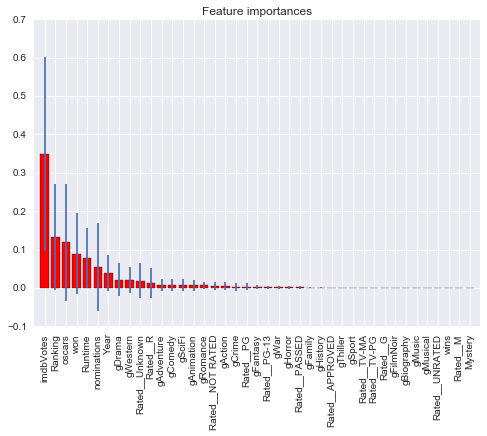

In [66]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])

In [67]:
#confusion matrix
Y_pred = rf.predict(x_train)
conmat = np.array(confusion_matrix(y_train, Y_pred))

confusion = pd.DataFrame(conmat, index=['High score', 'Low score'],
                         columns=['Predicted High score', 'Low score'])

print(confusion)
#something is wrong with these numbers

            Predicted High score  Low score
High score                    57          1
Low score                      0        138


In [68]:
#Precision is tp/(tp + fp)  is the probabliy that some predicted to be high were not 

#recall = tp/(tp + fn)  that someone who predicted to be high was so

cls_rep = classification_report(y_train, Y_pred)
print(cls_rep)

             precision    recall  f1-score   support

          0       1.00      0.98      0.99        58
          1       0.99      1.00      1.00       138

avg / total       0.99      0.99      0.99       196



# Extra Trees

In [69]:
et = ExtraTreesClassifier(class_weight='balanced', n_jobs=-1)
et.fit(x_train, y_train)
importances = et.feature_importances_
std = np.std([tree.feature_importances_ for tree in et.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
feature_names = X.columns
et.score(x_train, y_train)

1.0

(-1, 41)

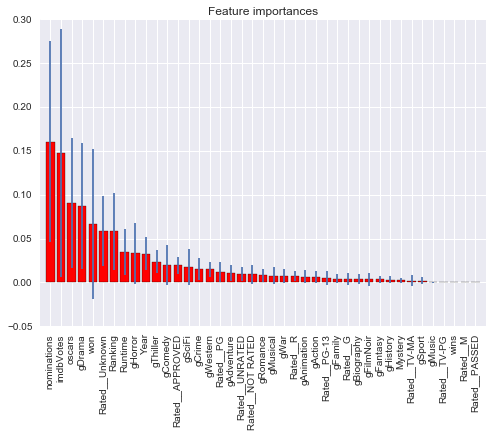

In [70]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])

In [71]:
Y_pred = et.predict(x_train)
conmat = np.array(confusion_matrix(y_train, Y_pred))

confusion = pd.DataFrame(conmat, index=['High score', 'Low score'],
                         columns=['Predicted High score', 'Low score'])
print(confusion)

            Predicted High score  Low score
High score                    58          0
Low score                      0        138


# Finally running test data through the model

The models
Knn
Decision Trees
Random Forest
Extra Trees

In [90]:
#Knn

print 'The knn score is ' + str(knn.score(x_test, y_test))
scores=cross_val_score(knn, x_test, y_test,  cv=5, scoring ='accuracy')
print scores
print scores.mean()


The knn score is 0.923664122137
[ 0.92592593  0.88461538  0.92307692  0.88461538  0.96153846]
0.915954415954


In [91]:
#decision tree
dt.fit(x_test, y_test)
print 'Decision tree score is ' + str(dt.score(x_test, y_test))

Decision tree score is 1.0


In [92]:

bagging.fit(x_test, y_test)
print cross_val_score(bagging, x_test, y_test, cv=5, n_jobs=-1).mean()

0.923646723647


In [93]:
#random forest
rf.fit(x_test, y_test)
print cross_val_score(rf, x_test, y_test, cv=5, n_jobs=-1).mean()

0.946723646724


In [94]:
#Extra trees
et.fit(x_test, y_test)
print et.score(x_test, y_test)

1.0


my blogspot
project6-ga.blogspot.com